<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.802349,58.658582,46.513939,498.155837,652.130706,199.101117,453.029589
1,0.0,1.0,24.100433,47.493504,86.218280,379.253215,547.065433,81.341521,465.723912
2,0.0,2.0,63.108570,29.005167,73.332879,-31.851823,143.594793,124.011117,19.583676
3,0.0,3.0,91.776663,26.059987,23.411637,103.961317,255.209605,255.256791,-0.047186
4,0.0,4.0,58.606194,48.968042,67.183011,-574.144516,-389.387268,165.521077,-554.908346
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.582027,39.764749,33.991134,1077.013814,1238.351724,0.550968,1237.800756
249996,999.0,246.0,65.752222,37.838419,59.722296,-496.757984,-323.445047,174.059774,-497.504821
249997,999.0,247.0,35.940886,66.748539,24.947292,1326.468098,1464.104815,76.309504,1387.795310
249998,999.0,248.0,56.520357,88.021783,23.209092,-2250.673336,-2072.922103,20.969751,-2093.891854


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    38.802349  58.658582  46.513939   498.155837   652.130706   
      1.0    24.100433  47.493504  86.218280   379.253215   547.065433   
      2.0    63.108570  29.005167  73.332879   -31.851823   143.594793   
      3.0    91.776663  26.059987  23.411637   103.961317   255.209605   
      4.0    58.606194  48.968042  67.183011  -574.144516  -389.387268   
...                ...        ...        ...          ...          ...   
999.0 245.0  77.582027  39.764749  33.991134  1077.013814  1238.351724   
      246.0  65.752222  37.838419  59.722296  -496.757984  -323.445047   
      247.0  35.940886  66.748539  24.947292  1326.468098  1464.104815   
      248.0  56.520357  88.021783  23.209092 -2250.673336 -2072.922103   
      249.0  81.587248  97.964850  28.084373 -2358.126530 -2140.490059   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    199.101117   453.029589  
      1.0     81.341521   465.723912  
      2.0    124.011117    19.583676  
      3.0    255.256791    -0.047186  
      4.0    165.521077  -554.908346  
...                 ...          ...  
999.0 245.0    0.550968  1237.800756  
      246.0  174.059774  -497.504821  
      247.0   76.309504  1387.795310  
      248.0   20.969751 -2093.891854  
      249.0  -15.343292 -2125.146767  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    38.802349  58.658582  46.513939   498.155837   652.130706   
      1.0    24.100433  47.493504  86.218280   379.253215   547.065433   
      2.0    63.108570  29.005167  73.332879   -31.851823   143.594793   
      3.0    91.776663  26.059987  23.411637   103.961317   255.209605   
      4.0    58.606194  48.968042  67.183011  -574.144516  -389.387268   
...                ...        ...        ...          ...          ...   
999.0 245.0  77.582027  39.764749  33.991134  1077.013814  1238.351724   
      246.0  65.752222  37.838419  59.722296  -496.757984  -323.445047   
      247.0  35.940886  66.748539  24.947292  1326.468098  1464.104815   
      248.0  56.520357  88.021783  23.209092 -2250.673336 -2072.922103   
      249.0  81.587248  97.964850  28.084373 -2358.126530 -2140.490059   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    199.101117   453.029589  
      1.0     81.341521   465.723912  
      2.0    124.011117    19.583676  
      3.0    255.256791    -0.047186  
      4.0    165.521077  -554.908346  
...                 ...          ...  
999.0 245.0    0.550968  1237.800756  
      246.0  174.059774  -497.504821  
      247.0   76.309504  1387.795310  
      248.0   20.969751 -2093.891854  
      249.0  -15.343292 -2125.146767  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,38.802349,58.658582,46.513939,498.155837,652.130706,199.101117,453.029589
1,0.0,1.0,24.100433,47.493504,86.218280,379.253215,547.065433,81.341521,465.723912
2,0.0,2.0,63.108570,29.005167,73.332879,-31.851823,143.594793,124.011117,19.583676
3,0.0,3.0,91.776663,26.059987,23.411637,103.961317,255.209605,255.256791,-0.047186
4,0.0,4.0,58.606194,48.968042,67.183011,-574.144516,-389.387268,165.521077,-554.908346
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,77.582027,39.764749,33.991134,1077.013814,1238.351724,0.550968,1237.800756
249996,999.0,246.0,65.752222,37.838419,59.722296,-496.757984,-323.445047,174.059774,-497.504821
249997,999.0,247.0,35.940886,66.748539,24.947292,1326.468098,1464.104815,76.309504,1387.795310
249998,999.0,248.0,56.520357,88.021783,23.209092,-2250.673336,-2072.922103,20.969751,-2093.891854


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    38.802349  58.658582  46.513939   498.155837   652.130706   
      1.0    24.100433  47.493504  86.218280   379.253215   547.065433   
      2.0    63.108570  29.005167  73.332879   -31.851823   143.594793   
      3.0    91.776663  26.059987  23.411637   103.961317   255.209605   
      4.0    58.606194  48.968042  67.183011  -574.144516  -389.387268   
...                ...        ...        ...          ...          ...   
999.0 245.0  77.582027  39.764749  33.991134  1077.013814  1238.351724   
      246.0  65.752222  37.838419  59.722296  -496.757984  -323.445047   
      247.0  35.940886  66.748539  24.947292  1326.468098  1464.104815   
      248.0  56.520357  88.021783  23.209092 -2250.673336 -2072.922103   
      249.0  81.587248  97.964850  28.084373 -2358.126530 -2140.490059   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    199.101117   453.029589  
      1.0     81.341521   465.723912  
      2.0    124.011117    19.583676  
      3.0    255.256791    -0.047186  
      4.0    165.521077  -554.908346  
...                 ...          ...  
999.0 245.0    0.550968  1237.800756  
      246.0  174.059774  -497.504821  
      247.0   76.309504  1387.795310  
      248.0   20.969751 -2093.891854  
      249.0  -15.343292 -2125.146767  

[250000 rows x 7 columns]

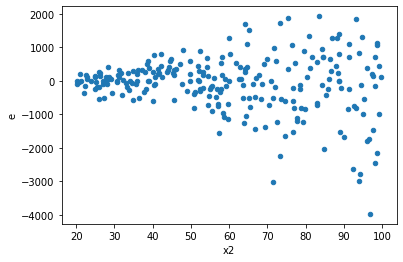

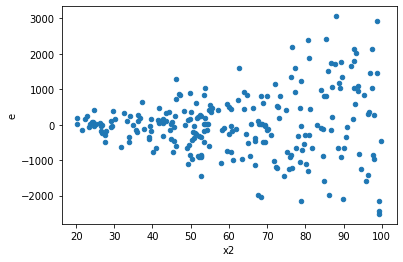

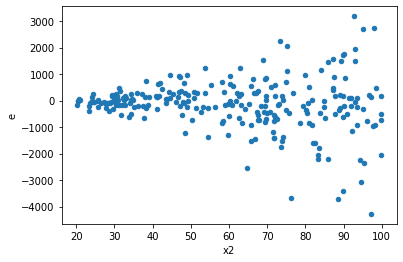

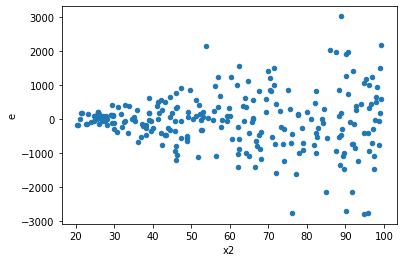

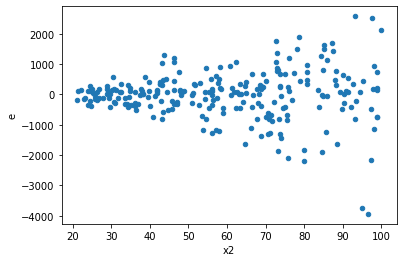

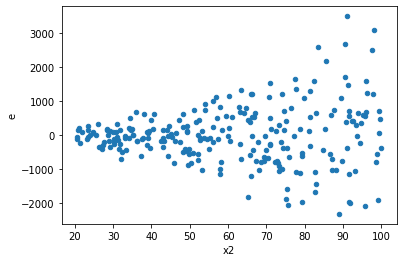

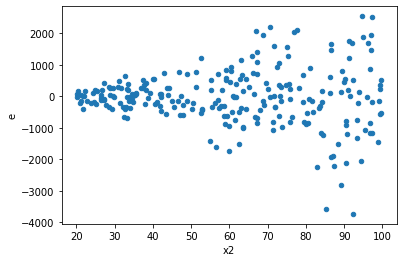

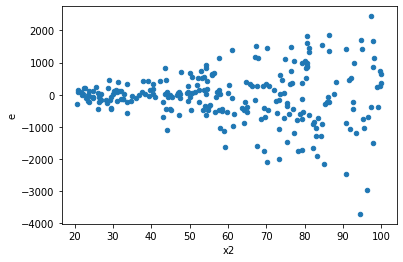

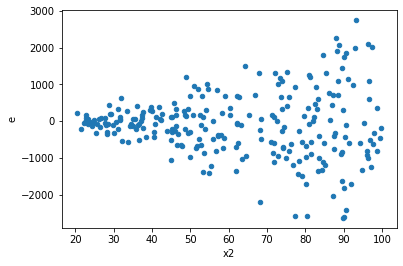

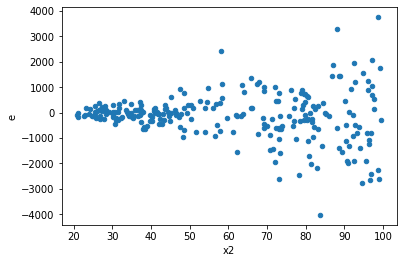

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,132.0,112.0,74759038.86493894,77016193.25823335,566356.3550374162,687644.5826627978,1.21415532208051,0.2903907039920135,0.8548046480039933,0.14519535199600675,Reject005=1 : Homoscedasticity
6.0,113.0,131.0,67261473.46721768,95534176.28750174,595234.278470953,729268.5212786392,1.22517897180249,0.26163451793721926,0.8691827410313904,0.13081725896860963,Reject005=1 : Homoscedasticity
7.0,120.0,124.0,88603428.94719477,91960008.1626873,738361.9078932897,741612.9690539299,1.0044030727017272,0.979894210331623,0.5100528948341885,0.4899471051658115,Reject005=1 : Homoscedasticity
10.0,104.0,140.0,60968093.01302045,111773167.30715394,586231.663586735,798379.766479671,1.3618844154458538,0.08872247646326215,0.9556387617683689,0.04436123823163107,Reject005=1 : Homoscedasticity
12.0,117.0,127.0,22128988.52665921,193715927.48044622,189136.65407401032,1525322.2636255608,8.064657118385382,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
13.0,114.0,130.0,51542240.85650974,113225612.80014579,452124.91979394504,870966.2523088137,1.9263840902769853,0.00031396673255335017,0.9998430166337233,0.00015698336627667508,Reject005=0 : Heteroscedasticity
14.0,117.0,127.0,50641539.407171495,105598491.52680713,432833.6701467649,831484.1852504498,1.921024732129806,0.0003408414169430163,0.9998295792915285,0.00017042070847150814,Reject005=0 : Heteroscedasticity
17.0,119.0,125.0,71069642.14957649,90760820.79968818,597223.8836098864,726086.5663975053,1.2157694732647255,0.28104954397311976,0.8594752280134401,0.14052477198655988,Reject005=1 : Homoscedasticity
18.0,122.0,122.0,27255929.41952709,160280197.89238074,223409.2575371073,1313772.1138719732,5.8805625530256345,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,132.0,112.0,74759038.86493894,77016193.25823335,566356.3550374162,687644.5826627978,1.21415532208051,0.2903907039920135,Reject005=1 : Homoscedasticity
1.0,112.0,132.0,111500951.97178861,64671984.48229378,995544.214033827,489939.27638101345,0.49213211173799876,0.00013662293723343776,Reject005=0 : Heteroscedasticity
2.0,129.0,115.0,112026812.23923592,82566558.11258729,868424.9010793483,717970.0705442373,0.8267497507866096,0.2930671741779274,Reject005=1 : Homoscedasticity
3.0,104.0,140.0,106585025.14783378,78387552.81816152,1024856.0110368633,559911.0915582966,0.546331470497817,0.001303057155922446,Reject005=0 : Heteroscedasticity
4.0,117.0,127.0,91015808.49010862,81391293.05571604,777912.8930778515,640876.3232733547,0.8238407268681398,0.2880673780787226,Reject005=1 : Homoscedasticity
5.0,127.0,117.0,126341121.54285339,20343227.538160294,994811.9806523889,173873.73964239567,0.1747805042801865,4.289152466972862e-20,Reject005=0 : Heteroscedasticity
6.0,113.0,131.0,67261473.46721768,95534176.28750174,595234.278470953,729268.5212786392,1.22517897180249,0.26163451793721926,Reject005=1 : Homoscedasticity
7.0,120.0,124.0,88603428.94719477,91960008.1626873,738361.9078932897,741612.9690539299,1.0044030727017272,0.979894210331623,Reject005=1 : Homoscedasticity
8.0,115.0,129.0,97139269.45056757,98113678.37796874,844689.2995701528,760571.1502168119,0.9004152776693785,0.5666428779482021,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    569
Reject005=1 : Homoscedasticity      431
Name: Result_test, dtype: int64